In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/My\ Drive/Game\ of\ Deep\ Learning/images/

/content/gdrive/My Drive/Game of Deep Learning/images


In [3]:
!find . -type f | wc -l

8932


In [4]:
cd /content/gdrive/My\ Drive/Game\ of\ Deep\ Learning/

/content/gdrive/My Drive/Game of Deep Learning


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_ApKoW4T.csv')

In [7]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [8]:
test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


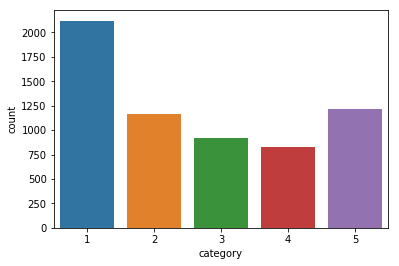

In [9]:
sns.countplot(x="category", data=train),
plt.show()

In [10]:
train['category'].value_counts()

1    2120
5    1217
2    1167
3     916
4     832
Name: category, dtype: int64

In [11]:
train.isnull().sum()

image       0
category    0
dtype: int64

In [12]:
test.isnull().sum()

image    0
dtype: int64

In [13]:
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
datagen=ImageDataGenerator(rotation_range=40, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=True, vertical_flip=True, rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

A sample image from training set



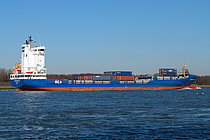

In [15]:
from IPython.display import Image

PATH = "./images/"
print("A sample image from training set\n")
Image(filename = PATH + train["image"][0], width=224, height=224)

A sample image from validation set



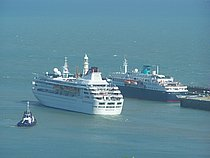

In [16]:
print("A sample image from validation set\n")
Image(filename = PATH + train["image"][5006], width=224, height=224)

A sample image from test set



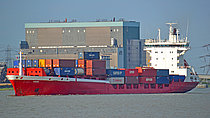

In [17]:
print("A sample image from test set\n")
Image(filename = PATH + test["image"][2000], width=224, height=224)

In [0]:
batch_size = 16

In [0]:
temp = []
for i in range (len(train['category'])):
  local = str(train['category'][i])
  temp.append(local)
train.insert(2, "String_category", temp)
del temp

In [20]:
#train_generator = datagen.flow_from_dataframe(dataframe=train[:5000], directory="./images/",
#                                            x_col="image", y_col="String_category", batch_size=batch_size, shuffle=True, class_mode="categorical", target_size=(224,224))
#valid_generator = datagen.flow_from_dataframe(dataframe=train[5000:], directory="./images/",
#                                            x_col="image", y_col="String_category", batch_size=batch_size, shuffle=True, class_mode="categorical", target_size=(224,224))
test_generator  = datagen.flow_from_dataframe(dataframe=test, directory="./images/",
                                            x_col="image", batch_size=1, shuffle=False, class_mode=None, target_size=(224,224))

Found 5000 validated image filenames belonging to 5 classes.
Found 1252 validated image filenames belonging to 5 classes.
Found 2680 validated image filenames.


In [43]:
temp_generator = datagen.flow_from_dataframe(dataframe=train, directory="./images/",
                                            x_col="image", y_col="String_category", batch_size=batch_size, shuffle=True, class_mode="categorical", target_size=(224,224))

Found 6252 validated image filenames belonging to 5 classes.


In [21]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
base_model=VGG16(include_top=False, weights='imagenet')
base_model.trainable=False

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [22]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model

plot_model(base_model, to_file='vgg16.png')

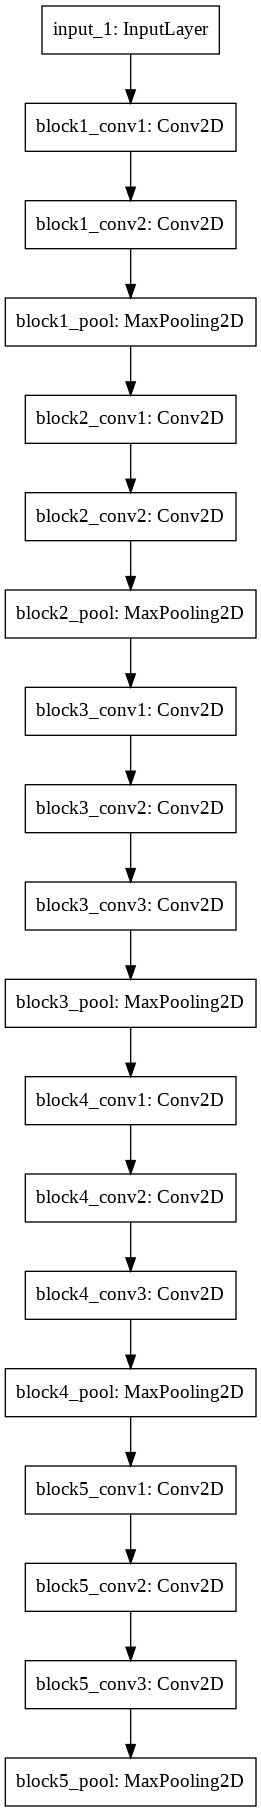

In [24]:
Image(filename = "vgg16.png")

In [0]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16


vgg = VGG16(weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False

In [0]:
features = Model(inputs=base_model.input,outputs=base_model.get_layer('block5_pool').output)

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
train_generator.reset()

train_features = base_model.predict_generator(train_generator, steps=STEP_SIZE_TRAIN, verbose=1)

In [0]:
#print(train_features.shape)

STEP_SIZE_VAL=valid_generator.n//valid_generator.batch_size
valid_generator.reset()

valid_features = base_model.predict_generator(valid_generator, steps=STEP_SIZE_VAL, verbose=1)
#print(valid_features.shape)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

test_features = base_model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
#print(test_features.shape)

In [0]:
#print(train_features.shape)
#print(valid_features.shape)
#print(test_features.shape)

train_features = np.reshape(train_features, (train_features.shape[0], -1))
valid_features = np.reshape(valid_features, (valid_features.shape[0], -1))
test_features = np.reshape(test_features, (test_features.shape[0], -1))

#print ("****************************")
#print(train_features.shape)
#print(valid_features.shape)
#print(test_features.shape)

In [0]:
STEP_SIZE_TEMP=temp_generator.n//temp_generator.batch_size
temp_generator.reset()

temp_features = base_model.predict_generator(temp_generator, steps=STEP_SIZE_TEMP, verbose=1)
#print(temp_features.shape)

temp_features = np.reshape(temp_features, (temp_features.shape[0], -1))
#print(temp_features.shape)

In [45]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(temp_features, train['category'])

print('fitting done !!!')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fitting done !!!


In [0]:
test_category = svm.predict(test_generator)

In [0]:
sub = pd.read_csv('sample_submission_ns2btKE.csv')

In [0]:
sub.drop(columns = ["category"])

In [0]:
sub.insert(1, "category", Y_test)

In [0]:
sub.to_csv('submit_VGG16_SVM.csv')